# ADHD Predicaion Using Logistic regresion,KNN,Navie Bayes 

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import math 
import string
from pathlib import Path
import os
import glob
import mne

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, roc_curve, roc_auc_score, accuracy_score, log_loss, recall_score, precision_score, f1_score, plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

In [87]:
cd\Users\Dell\Downloads

C:\Users\Dell\Downloads


# adhd.csv is the dataset of those who are suffering from adhd

In [88]:
df=pd.read_csv("adhd.csv")

In [89]:
adhd_df=df.drop(['Unnamed: 20'],axis=1)

In [90]:
adhd_df.size

1520

# Shape of Data set

In [91]:
adhd_df.shape

(76, 20)

In [92]:
adhd_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,140.703377,143.592429,148.368902,142.220346,148.598711,148.604666,148.605564,148.401697,148.659488,155.028145,148.467613,148.698891,148.665851,148.689835,148.321015,149.330968,141.963942,142.645864,142.386523,1
1,132.977629,133.583795,139.545547,133.623890,139.835687,139.288800,139.776676,138.779029,138.173876,135.292821,137.812332,134.692583,136.990766,133.740691,136.161096,132.844385,126.622103,125.794459,126.139678,1
2,146.543591,144.412220,148.730255,141.561585,149.584819,148.659928,149.576960,148.224987,149.034167,147.899721,148.996982,148.115426,148.956950,147.606344,149.324754,148.374979,142.363419,141.470247,142.412391,1
3,137.796209,136.893065,141.313007,135.692191,140.970145,141.468306,140.810852,140.945487,141.382163,141.206643,141.333355,142.190796,141.207721,141.746387,141.082023,141.444029,136.182049,136.036448,135.928943,1
4,146.172399,146.371924,151.967072,145.521323,151.673378,152.115143,151.470498,151.591723,151.499021,151.378985,151.997973,151.203300,151.600811,151.712738,151.189318,151.151706,145.275028,145.363255,144.913031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,135.820446,135.693683,141.489594,136.326213,141.256698,142.456149,141.362038,141.977235,141.614831,142.721208,142.067440,143.721941,142.958987,143.309612,142.485871,142.644004,136.377968,137.288801,136.063534,1
72,138.246816,139.202446,145.069133,139.312007,145.115626,145.913382,145.186274,145.558015,145.268951,145.703356,144.899333,145.808268,144.893370,145.858601,145.192642,145.846372,139.112189,139.719931,138.912978,1
73,139.576766,139.822472,145.722749,139.862500,145.570672,146.215201,145.730229,146.178220,149.086773,146.497161,146.115859,146.611634,146.083864,146.688019,146.028913,147.211946,140.170014,139.898511,140.032791,1
74,138.961756,138.699116,145.441656,139.112922,145.351152,145.541250,145.460054,145.247791,145.718238,146.078770,146.203680,146.125561,145.185680,146.038462,145.960379,146.047697,140.177242,139.644828,140.314863,1


# control_df  is the Data set of healthy children

In [93]:
control_df=pd.read_csv("adhdcontrol1.csv")

# Shape of control_df

In [94]:
control_df.shape

(79, 20)

In [95]:
control_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,137.783600,136.686720,145.045200,138.570240,145.502320,145.108960,145.674720,144.911200,145.673280,145.214960,145.635440,145.442880,145.976000,145.270160,146.161840,145.341200,139.513040,139.304720,139.776320,0
1,139.196240,141.495570,145.887213,140.417804,145.441152,146.888171,145.037117,145.986770,145.378652,146.688877,145.501317,147.139188,145.687141,147.268738,145.815972,146.765685,140.201209,141.466415,140.199713,0
2,139.865804,140.130118,145.978510,140.082118,146.098588,146.584863,146.378980,146.404471,146.126274,147.558431,146.673725,146.578902,146.661569,147.113882,146.636941,147.134745,141.052784,141.202588,140.916784,0
3,125.593435,126.877995,134.152111,129.225577,134.713859,134.981743,134.875977,134.964891,134.821996,132.628456,133.423506,130.950408,133.941631,130.501624,132.577109,129.947950,124.001141,122.356974,123.268147,0
4,137.223714,137.652562,143.618066,137.697084,143.414221,143.618986,143.310091,142.983166,142.730108,142.049673,142.757152,142.231166,142.700580,141.682182,142.180480,141.210008,135.410082,135.722933,135.056021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,143.237782,143.234953,150.473372,143.729684,150.527831,150.218615,150.617441,149.758611,149.787821,149.203692,149.938044,149.894335,150.611854,149.636042,150.161751,148.980480,144.254898,144.257585,144.070656,0
75,142.988429,142.893071,149.253403,142.897699,149.124217,149.441669,149.551320,149.396270,149.847128,150.351075,149.962428,149.951334,149.490539,149.831745,149.995508,150.123401,143.610128,144.572693,144.014838,0
76,140.723595,141.159434,148.019471,141.732936,147.760813,147.981607,147.991881,147.674235,147.868803,148.762466,148.188533,148.837117,148.596709,148.912847,148.634933,148.667481,142.567036,142.985702,143.172008,0
77,139.609096,139.742627,144.457579,138.764186,144.087689,144.227215,143.692545,143.965845,143.630352,144.336886,144.545328,146.242112,144.202870,145.402955,144.131169,144.113668,139.462545,139.187428,138.549082,0


In [96]:
df_combined = pd.concat([adhd_df, control_df])
df_combined.reset_index(inplace = True)
df_combined = df_combined.drop('index', axis = 1)

# df_combined dataset of healthy and affected childrens

In [97]:
df_combined.shape

(155, 20)

In [98]:
df_combined

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,140.703377,143.592429,148.368902,142.220346,148.598711,148.604666,148.605564,148.401697,148.659488,155.028145,148.467613,148.698891,148.665851,148.689835,148.321015,149.330968,141.963942,142.645864,142.386523,1
1,132.977629,133.583795,139.545547,133.623890,139.835687,139.288800,139.776676,138.779029,138.173876,135.292821,137.812332,134.692583,136.990766,133.740691,136.161096,132.844385,126.622103,125.794459,126.139678,1
2,146.543591,144.412220,148.730255,141.561585,149.584819,148.659928,149.576960,148.224987,149.034167,147.899721,148.996982,148.115426,148.956950,147.606344,149.324754,148.374979,142.363419,141.470247,142.412391,1
3,137.796209,136.893065,141.313007,135.692191,140.970145,141.468306,140.810852,140.945487,141.382163,141.206643,141.333355,142.190796,141.207721,141.746387,141.082023,141.444029,136.182049,136.036448,135.928943,1
4,146.172399,146.371924,151.967072,145.521323,151.673378,152.115143,151.470498,151.591723,151.499021,151.378985,151.997973,151.203300,151.600811,151.712738,151.189318,151.151706,145.275028,145.363255,144.913031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,143.237782,143.234953,150.473372,143.729684,150.527831,150.218615,150.617441,149.758611,149.787821,149.203692,149.938044,149.894335,150.611854,149.636042,150.161751,148.980480,144.254898,144.257585,144.070656,0
151,142.988429,142.893071,149.253403,142.897699,149.124217,149.441669,149.551320,149.396270,149.847128,150.351075,149.962428,149.951334,149.490539,149.831745,149.995508,150.123401,143.610128,144.572693,144.014838,0
152,140.723595,141.159434,148.019471,141.732936,147.760813,147.981607,147.991881,147.674235,147.868803,148.762466,148.188533,148.837117,148.596709,148.912847,148.634933,148.667481,142.567036,142.985702,143.172008,0
153,139.609096,139.742627,144.457579,138.764186,144.087689,144.227215,143.692545,143.965845,143.630352,144.336886,144.545328,146.242112,144.202870,145.402955,144.131169,144.113668,139.462545,139.187428,138.549082,0


### 1 -> corresponds to ADHD class 
###  0 -> corresponds to Control clas

# Principal Component Analysis

In [99]:
x=df_combined.drop(['19'],axis=1)
y=df_combined['19']

In [100]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)

In [101]:
x_pca.shape

(155, 2)

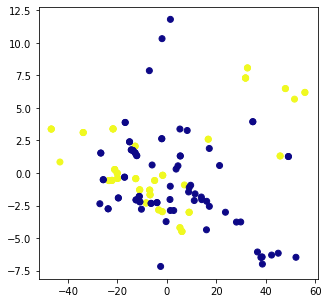

In [102]:
plt.figure(figsize=(5,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')

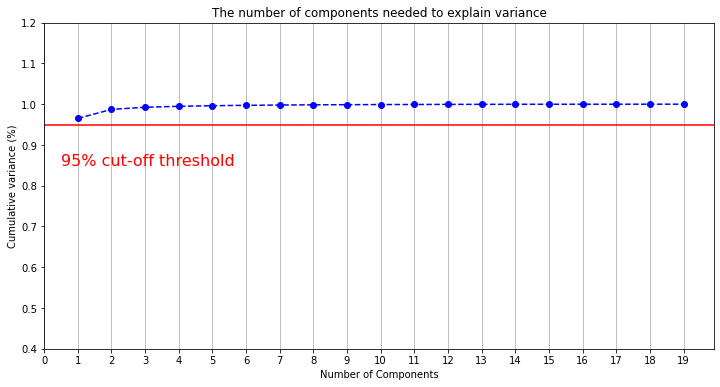

In [103]:
pca1 = PCA().fit(x)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 20, step=1)
y1 = np.cumsum(pca1.explained_variance_ratio_)

plt.ylim(0.4,1.2)
plt.plot(xi, y1, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 20, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [104]:
pca1.explained_variance_ratio_

array([9.65027237e-01, 2.22882210e-02, 5.11014186e-03, 2.36811360e-03,
       1.42429645e-03, 9.91891520e-04, 6.89384333e-04, 5.28602026e-04,
       3.70480986e-04, 2.86412965e-04, 2.07692480e-04, 1.75932666e-04,
       1.39358557e-04, 1.26793943e-04, 7.70290116e-05, 6.35968855e-05,
       5.49197443e-05, 4.07852858e-05, 2.91094780e-05])

In [105]:
opt_pca=PCA(n_components=5)
X_final_PCA=opt_pca.fit_transform(x)

In [106]:
X_pca_df=pd.DataFrame(X_final_PCA,columns=['pca1','pca2','pca3','pca4','pca5'])

In [107]:
X=X_pca_df

In [108]:
X.shape

(155, 5)

## Roc Curve

In [109]:
def plot_roc_curve(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc=roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.title("ROC curve",fontsize=18)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.show()

# Building different ML algorithms

# KNN

In [110]:
max0 = 0
y_pred_final_knn = []
y_test_final_knn = []
for train_index,test_index in skf.split(X, y):
    X_train_knn,X_test_knn = X.iloc[train_index], X.iloc[test_index]
    y_train_knn,y_test_knn = y.iloc[train_index], y.iloc[test_index]
    knn = KNeighborsClassifier()
    hyperparameters = {'n_neighbors': [2,3,4,5,6],'p':[1,2,3]}
    clf_knn = GridSearchCV(knn, hyperparameters,cv=5, verbose=0)
    best_model = clf_knn.fit(X_train_knn, y_train_knn)
    y_pred_knn = clf_knn.predict(X_test_knn)
    if accuracy_score(y_test_knn, y_pred_knn) > max0:
        max0 = accuracy_score(y_test_knn, y_pred_knn)
        y_test_final_knn = list(y_test_knn)
        y_pred_final_knn = list(y_pred_knn)
        X_test_final_knn = list(X_test_knn)

In [111]:
print("Accuracy for KNN model: ", accuracy_score(y_test_final_knn, y_pred_final_knn))

Accuracy for KNN model:  0.8589743589743589


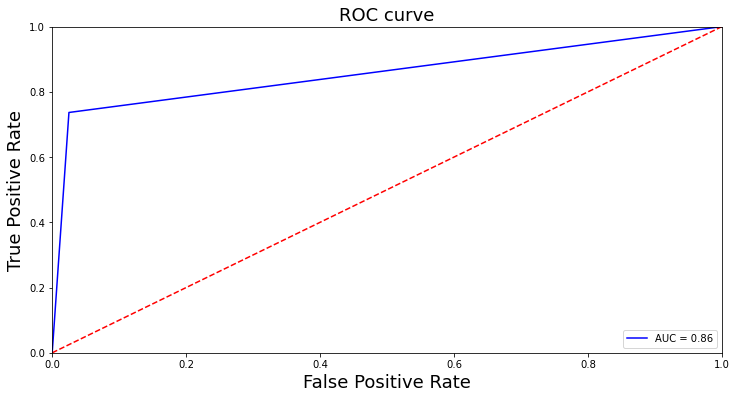

In [112]:
plot_roc_curve(y_test_final_knn, y_pred_final_knn)

# Logistic Regression

In [35]:
max0 = 0
y_pred_final_log = []
y_test_final_log = []
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

for train_index,test_index in skf.split(X, y):
    X_train_log,X_test_log = X.iloc[train_index], X.iloc[test_index]
    y_train_log,y_test_log = y.iloc[train_index], y.iloc[test_index]
    log = LogisticRegression()
    penalty = ['l1', 'l2']
    c = [0.1, 0.2, 0.003, 0.02, 0.005]
    hyperparameters = dict(C=c,penalty=penalty)
    clf_log = GridSearchCV(log, hyperparameters, cv=5, verbose=0)
    best_model = clf_log.fit(X_train_log, y_train_log)
    y_pred_log = clf_log.predict(X_test_log)
    if accuracy_score(y_test_log, y_pred_log) > max0:
        max0 = accuracy_score(y_test_log, y_pred_log)
        y_test_final_log = list(y_test_log)
        y_pred_final_log = list(y_pred_log)
        X_test_final_log = list(X_test_log)

In [36]:
print("Accuracy for Logistic model: ", accuracy_score(y_test_final_log, y_pred_final_log))

Accuracy for Logistic model:  0.6623376623376623


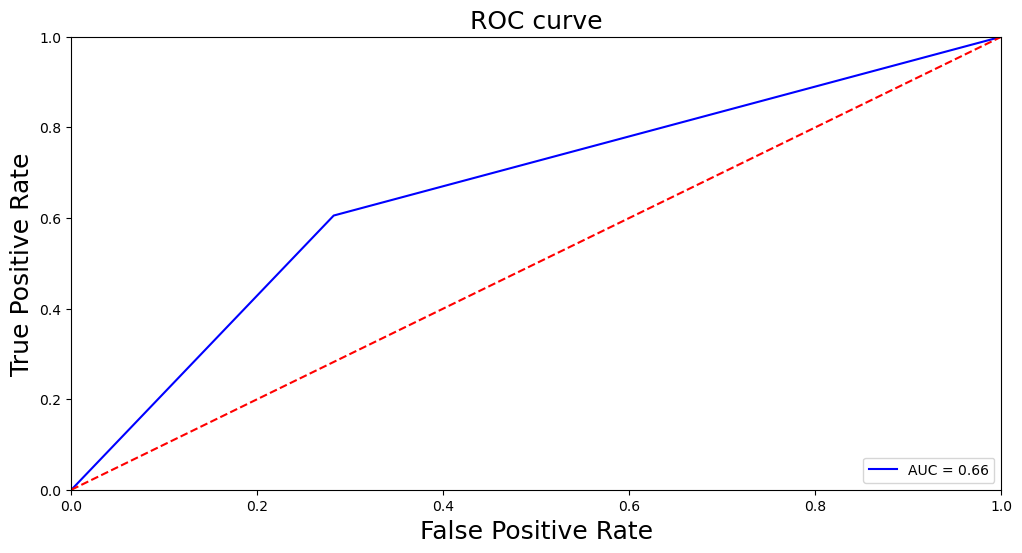

In [83]:
plot_roc_curve(y_test_final_log,y_pred_final_log)

# Naive Bayes

### Bernoulli Naive Bayes

In [37]:
max0 = 0
y_pred_final_bnb = []
y_test_final_bnb = []
for train_index,test_index in skf.split(X, y):
    X_train_bnb,X_test_bnb = X.iloc[train_index], X.iloc[test_index]
    y_train_bnb,y_test_bnb = y.iloc[train_index], y.iloc[test_index]
    bnb = BernoulliNB()
    hyperparameters = {'alpha':[10,20,30,40]}
    clf_bnb = GridSearchCV(bnb, hyperparameters, cv=5, verbose=0)
    best_model = clf_bnb.fit(X_train_bnb, y_train_bnb)
    y_pred_bnb = clf_bnb.predict(X_test_bnb)
    if accuracy_score(y_test_bnb, y_pred_bnb) > max0:
        max0 = accuracy_score(y_test_bnb, y_pred_bnb)
        y_test_final_bnb = list(y_test_bnb)
        y_pred_final_bnb = list(y_pred_bnb)
        X_test_final_bnb = list(X_test_bnb)

In [38]:
print("Accuracy for Bernoulli Naive Bayes model: ", accuracy_score(y_test_final_bnb, y_pred_final_bnb))

Accuracy for Bernoulli Naive Bayes model:  0.5128205128205128


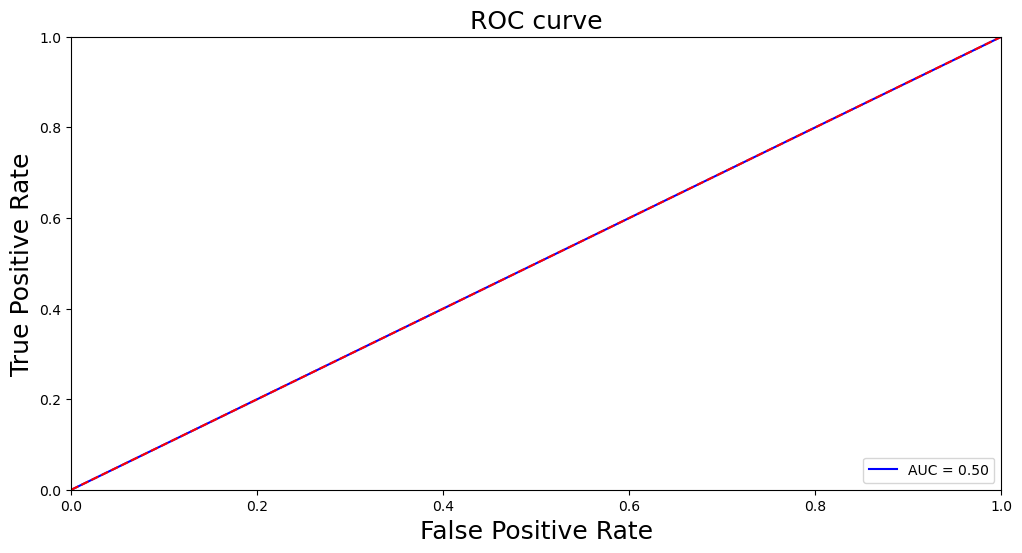

In [84]:
plot_roc_curve(y_test_final_bnb, y_pred_final_bnb)

### Gaussian Naive Bayes

In [39]:
max0 = 0
y_pred_final_gnb = []
y_test_final_gnb = []
for train_index,test_index in skf.split(X, y):
    X_train_gnb,X_test_gnb = X.iloc[train_index], X.iloc[test_index]
    y_train_gnb,y_test_gnb = y.iloc[train_index], y.iloc[test_index]
    gnb = GaussianNB()
    hyperparameters = {'var_smoothing': [0.1, 0.02, 0.004, 0.005, 0.8]}
    clf_gnb = GridSearchCV(gnb, hyperparameters,cv=5, verbose=0)
    best_model = clf_gnb.fit(X_train_gnb, y_train_gnb)
    y_pred_gnb = clf_gnb.predict(X_test_gnb)
    if accuracy_score(y_test_gnb, y_pred_gnb) > max0:
        max0 = accuracy_score(y_test_gnb, y_pred_gnb)
        y_test_final_gnb = list(y_test_gnb)
        y_pred_final_gnb = list(y_pred_gnb)
        X_test_final_gnb = list(X_test_gnb)

In [40]:
print("Accuracy for Gaussian Naive Bayes model: ", accuracy_score(y_test_final_gnb, y_pred_final_gnb))

Accuracy for Gaussian Naive Bayes model:  0.5256410256410257


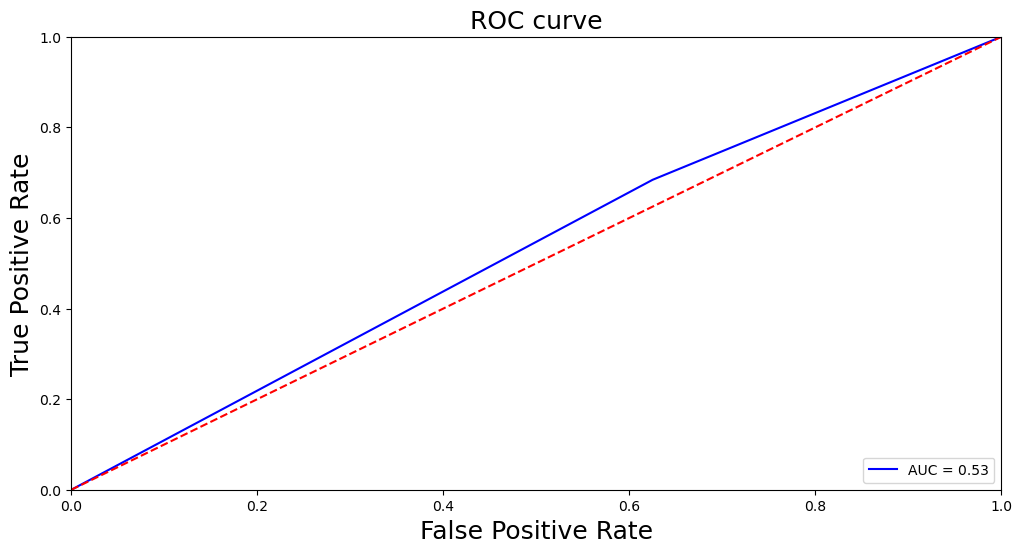

In [85]:
plot_roc_curve(y_test_final_gnb, y_pred_final_gnb)

# Conclusion

ADHD dataset was considred for this assignment. This dataset consists of two classes ADHD and Control where ADHD means the person is affected with Attention deficit hyperactivity disorder and control means the person is normal.
The labels were also added to these vectors were:-
1 -> ADHD class
0 -> Control class
Finally the dataset was tested against various machine learning models.For each model the best results are summarised below :-

1.)  KNN with accuracy 89.7%.  

2.)  Logistic Regression with accuracy 58%  


3.) Naive Bayes. 

    a. Benolli Naive Bayes with accuracy 51%. 
    b. Gaussian Naive Bayes with accuracy 54%. 
